In [2]:
!pip install -q kaggle

In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=1fb33c04e113fd5956b5353c8306978f061f77b89be09e20977aa72f63fc66b0
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset            Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          15846        340  1.0              
nelgiriyewithana/billionaires-statistics-dataset              Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           8527        212  1.0              
jocelyndumlao/consumer-review-of-clothing-product             Consumer Review of Clothing Product                  4MB  2023-10-19 04:45:23            997         28  1.0              
victorahaji/worlds-air-quality-and-water-pollution-dataset    World's Air Q

In [7]:
!kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:16<00:00, 23.4MB/s]
100% 331M/331M [00:16<00:00, 21.3MB/s]


In [8]:
!unzip -qq utkface-new.zip

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [10]:
width = height = 128

In [11]:
images = [] # X
ages = [] # Y

for image_name in os.listdir("UTKFace"):
  parts = image_name.split("_")
  age = int(parts[0])
  ages.append(age)
  #print(age)

  image = cv2.imread("UTKFace/" + image_name)
  image = cv2.resize(image, (width,height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image)

In [12]:
images = pd.Series(images, name="Images")
ages = pd.Series(ages,name="Ages")

df = pd.concat([images, ages], axis=1)
df.head()

,Images,Ages
0,"[[[43, 156, 239], [39, 158, 241], [37, 159, 24...",27
1,"[[[78, 56, 43], [80, 59, 46], [83, 60, 47], [8...",54
2,"[[[46, 46, 38], [52, 52, 44], [54, 54, 46], [5...",26
3,"[[[226, 205, 188], [212, 191, 174], [195, 175,...",66
4,"[[[127, 97, 65], [122, 88, 53], [120, 79, 40],...",8


34


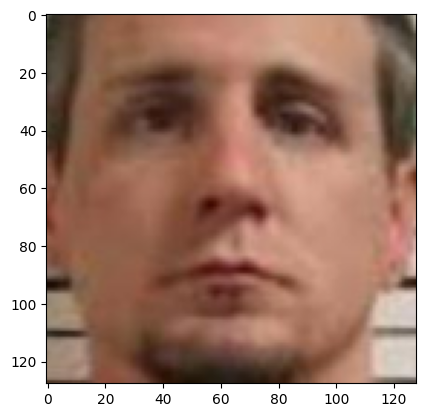

In [13]:
print(df["Ages"][240])
plt.imshow(df["Images"][240])
plt.show()

53


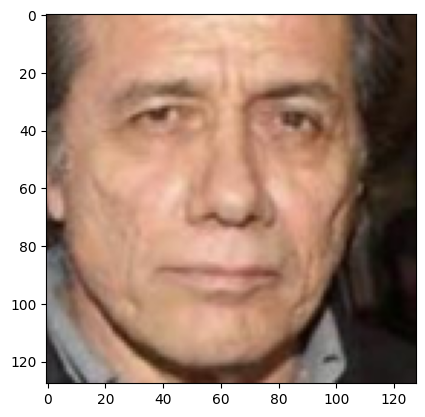

In [14]:
print(df["Ages"][20])
plt.imshow(df["Images"][20])
plt.show()

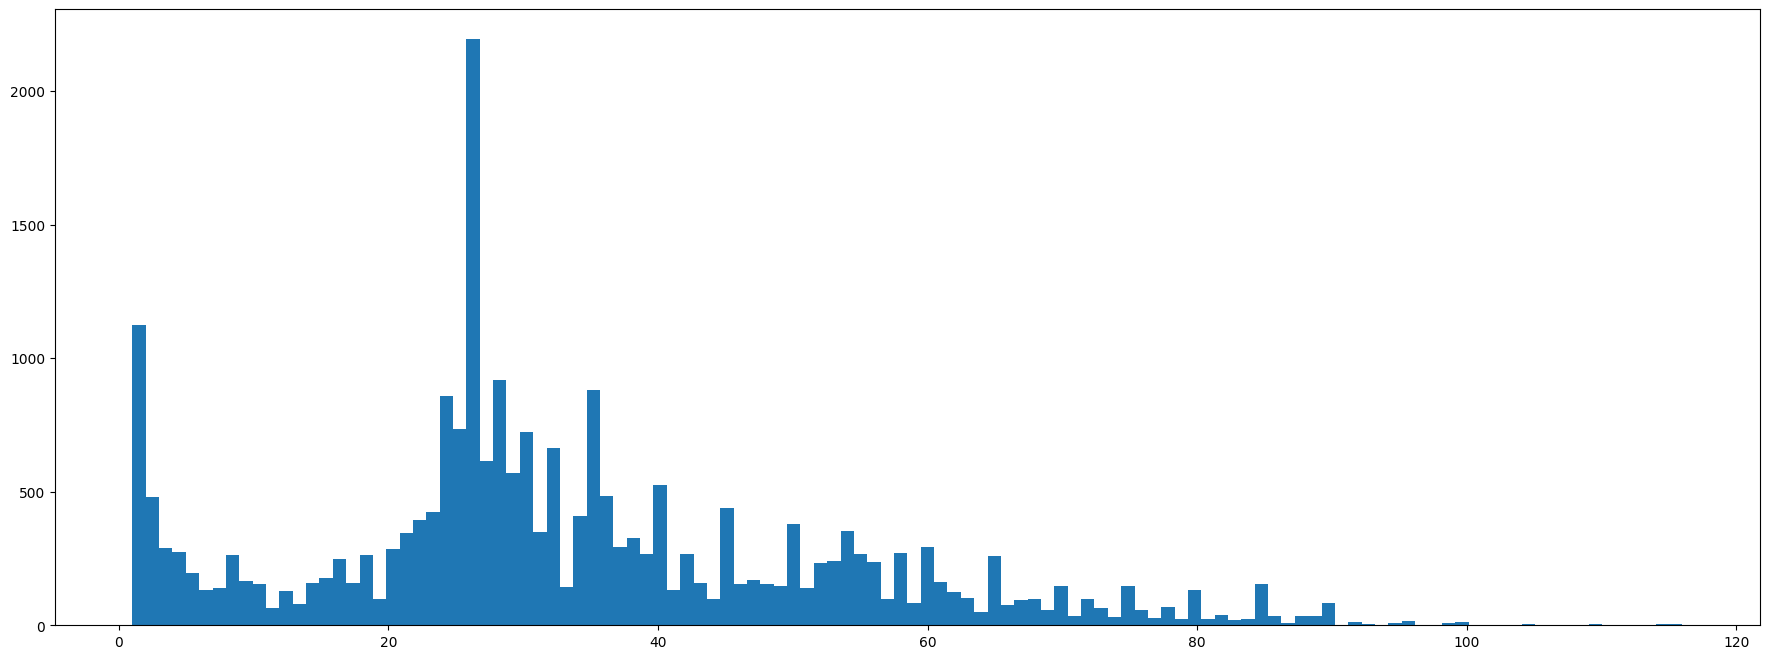

In [15]:
plt.figure(figsize=(22,8))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [16]:
df["Ages"].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: Ages, Length: 104, dtype: int64

In [17]:
df["Ages"].value_counts().max()

2197

In [18]:
under_4 = df[df["Ages"] <= 4]
up_4 = df[df["Ages"] > 4]


under_4 = under_4.sample(frac=0.3)

df = pd.concat([under_4, up_4], axis=0)



In [19]:
age_26 = df[df["Ages"] == 26]
under_26 = df[df["Ages"] < 26]
up_26 = df[df["Ages"] > 26]

age_26 = age_26.sample(frac=0.3)
df = pd.concat([under_26 , age_26 , up_26] , axis=0)

In [20]:
between_22_37 = df[(df['Ages'] >= 22 )&(df['Ages'] < 37)]
between_22_37  = between_22_37.sample(frac=0.8)

under_22 = df[df['Ages'] < 22]
up_37 = df[df['Ages'] >= 37]

df = pd.concat([under_22 , between_22_37 , up_37] , axis=0)


In [21]:
df = df[df["Ages"] < 80]

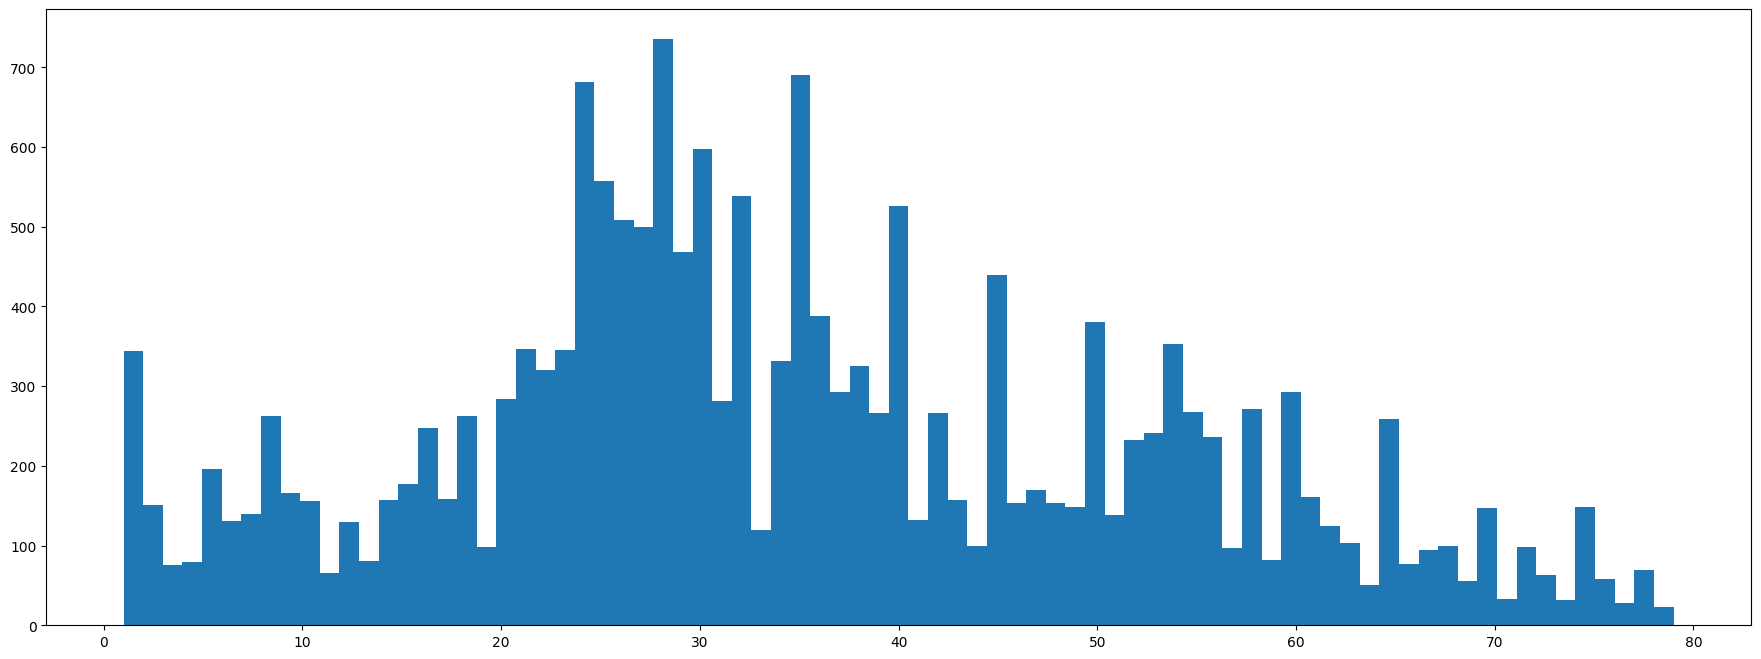

In [22]:
plt.figure(figsize=(22,8))
plt.hist(df["Ages"], bins=df["Ages"].max())
plt.show()

In [23]:
#  X = df["Images"].values
#  Y = df["Ages"].values

#  X.shape

In [24]:
X = np.array(df["Images"].values.tolist())
Y = np.array(df["Ages"].values.tolist())

X.shape , Y.shape

((18214, 128, 128, 3), (18214,))

In [25]:
X_train , X_val , Y_train , Y_val = train_test_split(X, Y , test_size=0.2)


In [26]:
print(X_train.shape , X_val.shape , Y_train.shape , Y_val.shape )

(14571, 128, 128, 3) (3643, 128, 128, 3) (14571,) (3643,)


In [27]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)


In [28]:
train_data = image_data_generator.flow(
    X_train,
    Y_train,
    batch_size=32,
    shuffle=True

)

validation_data = image_data_generator.flow(
    X_val,
    Y_val,
    batch_size=16,
    shuffle=False
)

In [29]:
print(X_train.shape , X_val.shape , Y_train.shape , Y_val.shape )

(14571, 128, 128, 3) (3643, 128, 128, 3) (14571,) (3643,)


### create model

In [30]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling="max"
    )

94765736/94765736 [==============================] - 5s 0us/step


In [31]:
#  Freeze

for layer in base_model.layers:
  layer.trainable = False

In [32]:
del under_4
del up_4
del under_22
del up_37
del between_22_37
del under_26
del up_26
del df

In [33]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="relu")
])

In [34]:
model.compile(loss = tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [35]:
model.fit(train_data,
          validation_data=validation_data,
          epochs=20)

Epoch 1/20
456/456 [==============================] - 44s 65ms/step - loss: 14.8840 - val_loss: 13.5370
Epoch 2/20
456/456 [==============================] - 30s 66ms/step - loss: 13.9738 - val_loss: 13.4733
Epoch 3/20
456/456 [==============================] - 30s 66ms/step - loss: 13.7951 - val_loss: 13.3282
Epoch 4/20
456/456 [==============================] - 30s 66ms/step - loss: 13.6698 - val_loss: 12.9366
Epoch 5/20
456/456 [==============================] - 30s 66ms/step - loss: 13.6424 - val_loss: 14.9911
Epoch 6/20
456/456 [==============================] - 30s 67ms/step - loss: 13.6586 - val_loss: 12.9816
Epoch 7/20
456/456 [==============================] - 26s 56ms/step - loss: 13.6413 - val_loss: 12.9363
Epoch 8/20
456/456 [==============================] - 26s 57ms/step - loss: 13.5811 - val_loss: 12.9634
Epoch 9/20
456/456 [==============================] - 31s 68ms/step - loss: 13.5783 - val_loss: 13.2179
Epoch 10/20
456/456 [==============================] - 30s 66ms/

1/1 [==============================] - 1s 1s/step


array([[21.295437]], dtype=float32)

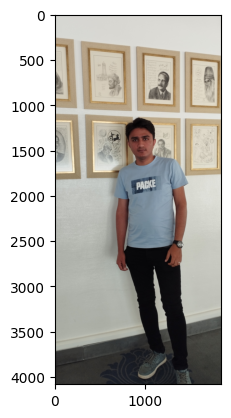

In [36]:
image = cv2.imread("/content/drive/MyDrive/dataset/عکس /image2_25.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image = cv2.resize(image,(width,height))
image = image / 255.0
image = image.reshape(1,width,height,3)
result = model.predict(image)
result

1/1 [==============================] - 0s 27ms/step


array([[49.201633]], dtype=float32)

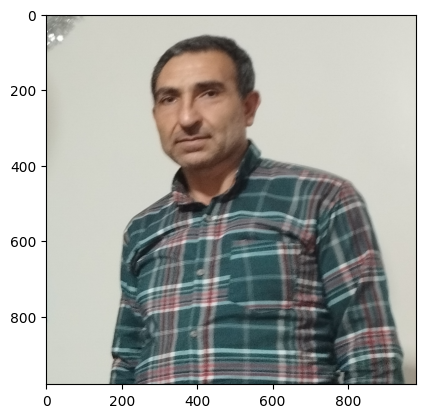

In [38]:
image3 = cv2.imread("/content/drive/MyDrive/dataset/عکس /IMG_2022_52.png")
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)
image3 = cv2.resize(image3,(width,height))
image3 = image3 / 255.0
image3 = image3.reshape(1,width,height,3)
result = model.predict(image3)
result